**SUPPORTLYTICS BY SAKTHESHWARAN T (MILESTONE 02)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("supportlytics_cleaned (1).csv")

TICKET DISTRIBUTION BY TICKET TYPE

/tmp/ipython-input-4256518837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


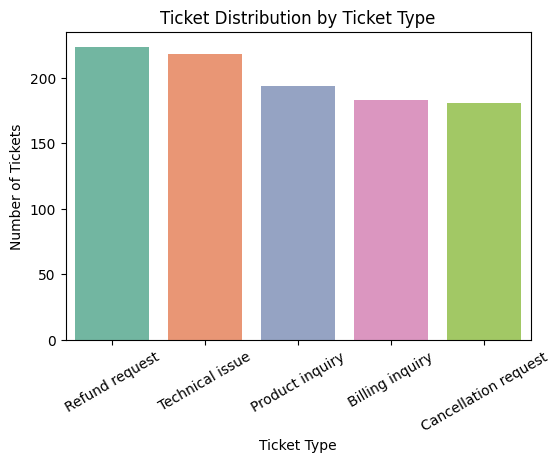

In [2]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Ticket Type",
    order=df["Ticket Type"].value_counts().index,
    palette="Set2"
)
plt.title("Ticket Distribution by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)
plt.show()


**Inference: Ticket Distribution by Ticket Type**

> Refund requests and technical issues form the majority of tickets, making them the main contributors to support workload.

> Other ticket types occur at similar but lower levels, indicating a     balanced secondary demand.

TOP TICKET ISSUE CATEGORIES

/tmp/ipython-input-326249499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


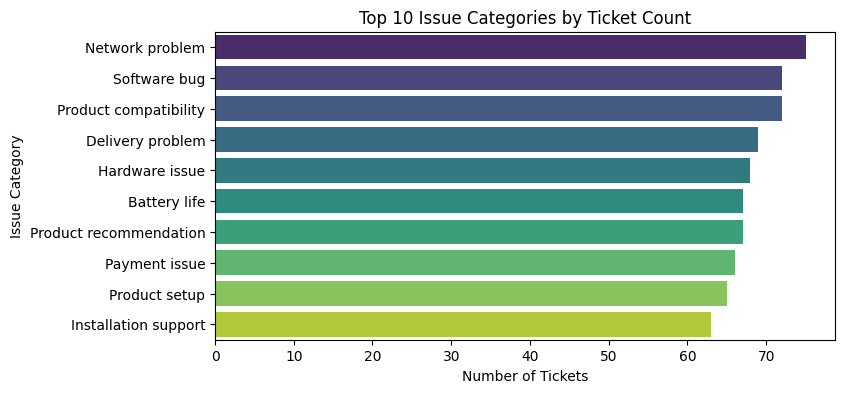

In [3]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    y="Ticket Subject",
    order=df["Ticket Subject"].value_counts().head(10).index,
    palette="viridis"
)
plt.title("Top 10 Issue Categories by Ticket Count")
plt.xlabel("Number of Tickets")
plt.ylabel("Issue Category")
plt.show()


**Inference: Top Issue Categories by Ticket Count**

> Network problems and software bugs are the most frequent issue categories, making them the primary contributors to support workload.

> Other categories such as product compatibility, delivery issues, and hardware problems each account for approximately 60–70 tickets, indicating a fairly even distribution of secondary issues.

TICKET DISTRIBUTION BY PRIORITY

/tmp/ipython-input-3010043314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


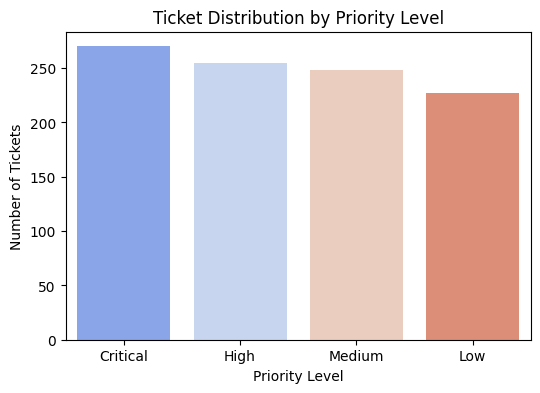

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Ticket Priority",
    order=["Critical", "High", "Medium", "Low"],
    palette="coolwarm"
)
plt.title("Ticket Distribution by Priority Level")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()

**Inference: Ticket Distribution by Priority Level**

> The higher concentration of critical and high-priority tickets suggests the need for faster triage mechanisms and dedicated resources to handle urgent issues efficiently.

> Medium and low priority tickets can be managed through scheduled workflows or automation to reduce pressure on support teams.

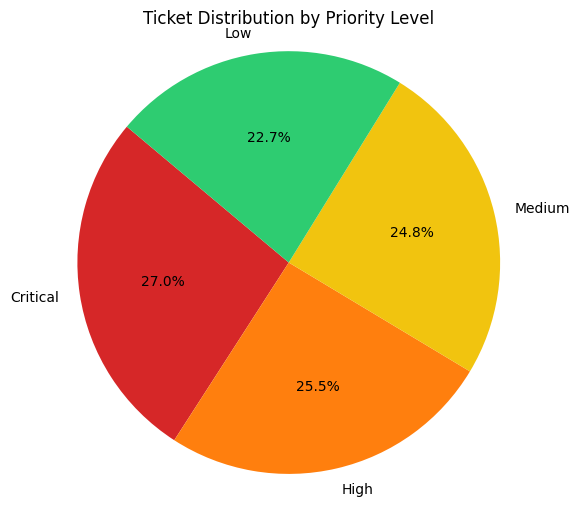

In [5]:
import matplotlib.pyplot as plt

# Count ticket priority values in required order
priority_counts = df["Ticket Priority"].value_counts().reindex(
    ["Critical", "High", "Medium", "Low"]
)

plt.figure(figsize=(6,6))
plt.pie(
    priority_counts,
    labels=priority_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#d62728", "#ff7f0e", "#f1c40f", "#2ecc71"]
)

plt.title("Ticket Distribution by Priority Level")
plt.axis("equal")  # Ensures perfect circle
plt.show()


TICKET DISTRIBUTION BY QUEUE/CHANNEL

/tmp/ipython-input-3152735776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/tmp/ipython-input-3152735776.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.countplot(


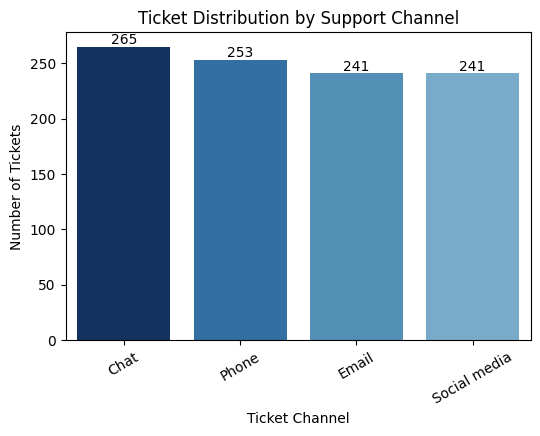

In [6]:
blue_palette = ["#08306b", "#2171b5", "#4292c6", "#6baed6", "#9ecae1"]

plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df,
    x="Ticket Channel",
    order=df["Ticket Channel"].value_counts().index,
    palette=blue_palette
)

plt.title("Ticket Distribution by Support Channel")
plt.xlabel("Ticket Channel")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

**Inference: Ticket Distribution by Queue**

> Chat and phone channels handle the highest volume of support requests, indicating a strong user preference for real-time communication and faster response expectations.

> Email and social media channels receive slightly fewer tickets, suggesting an opportunity to optimize these channels through automation or self-service options to balance overall support workload.

**MODULE 04**

In [7]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

Selecting numerical features which best describes the ticket behaviour:
- Resolution Duration
- Priority score
- Customer Satisfaction Rating

In [8]:
# Select features for clustering
features = df[
    ["Resolution_Duration", "Priority_Score", "Customer Satisfaction Rating"]
].copy()

Using Kmeans Clustering to group similar tickets together (Let K =4)

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

In [13]:
cluster_counts = df["Cluster"].value_counts().sort_index()
cluster_counts

,count
Cluster,
0,270
1,219
2,200
3,311


Plotting the number of tickets per cluster:

/tmp/ipython-input-2608168244.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


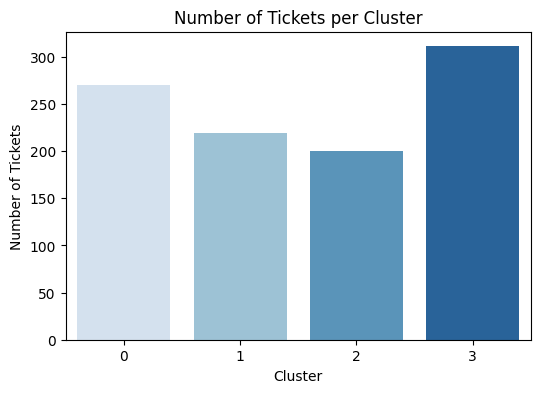

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette="Blues"
)

plt.title("Number of Tickets per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.show()


Finding the Average similarity of tickets within each clusters:
> Higher Similarity = More consistent cluster

In [15]:
cluster_similarity = {}

for cluster_id in df["Cluster"].unique():
    cluster_data = scaled_features[df["Cluster"] == cluster_id]
    similarity_matrix = cosine_similarity(cluster_data)
    cluster_similarity[cluster_id] = similarity_matrix.mean()

similarity_df = pd.DataFrame.from_dict(
    cluster_similarity, orient="index", columns=["Average Similarity"]
)

similarity_df


,Average Similarity
1,0.583619
2,0.652765
3,0.505501
0,0.579511


/tmp/ipython-input-3568309758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


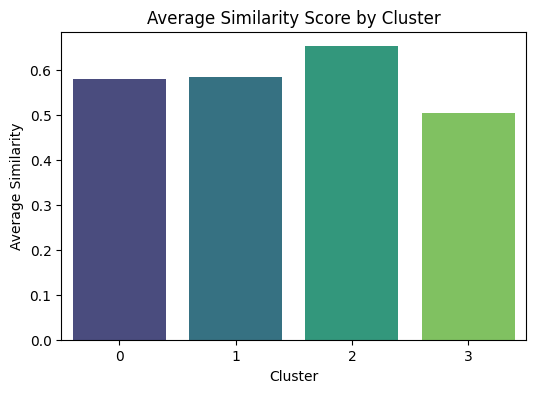

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=similarity_df.index,
    y="Average Similarity",
    data=similarity_df,
    palette="viridis"
)

plt.title("Average Similarity Score by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Similarity")
plt.show()


Plotting Cluster size vs. Issue types

In [29]:
cluster_issue_table = pd.crosstab(
    df["Cluster"],
    df["Ticket Subject"]
)

cluster_issue_table

Ticket Subject,Account access,Battery life,Cancellation request,Data loss,Delivery problem,Display issue,Hardware issue,Installation support,Network problem,Payment issue,Peripheral compatibility,Product compatibility,Product recommendation,Product setup,Refund request,Software bug
Cluster,,,,,,,,,,,,,,,,
0,17,16,17,9,16,12,17,17,20,23,13,23,20,15,18,17
1,12,16,13,9,14,13,13,16,18,12,17,12,10,17,9,18
2,10,13,15,10,9,13,18,10,17,13,6,12,14,12,14,14
3,14,22,11,17,30,11,20,20,20,18,22,25,23,21,14,23


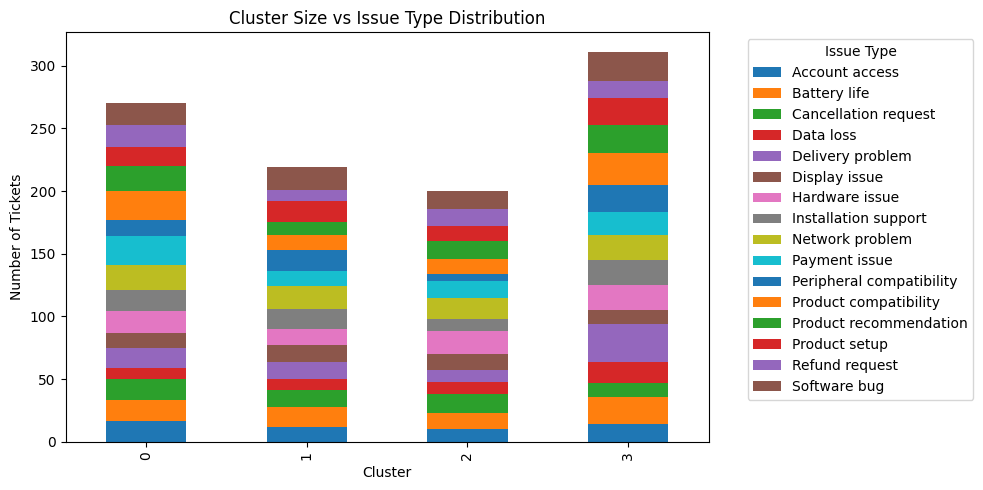

In [18]:
cluster_issue_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5)
)

plt.title("Cluster Size vs Issue Type Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.legend(title="Issue Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Performance Gaps using Scatter and Box plots

Scatter plot : Resolution duration vs satistfaction score

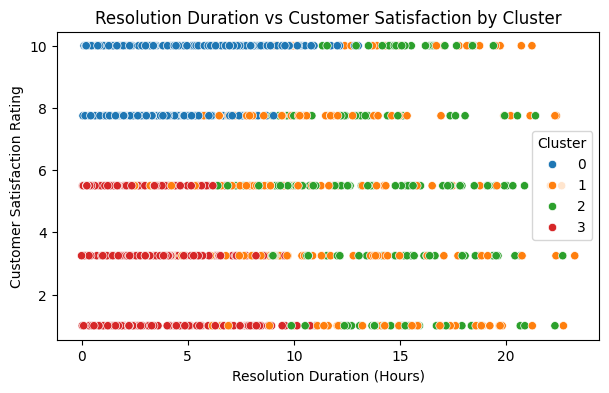

In [26]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x="Resolution_Duration",
    y="Customer Satisfaction Rating",
    hue="Cluster",
    palette="tab10"
)

plt.title("Resolution Duration vs Customer Satisfaction by Cluster")
plt.xlabel("Resolution Duration (Hours)")
plt.ylabel("Customer Satisfaction Rating")
plt.show()

Inference:

> Tickets with shorter resolution durations are generally associated with higher customer satisfaction across clusters.

> Clusters with longer resolution times show more instances of lower satisfaction ratings, indicating performance gaps.

Box plot : Resolution duration by cluster

/tmp/ipython-input-2988329254.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


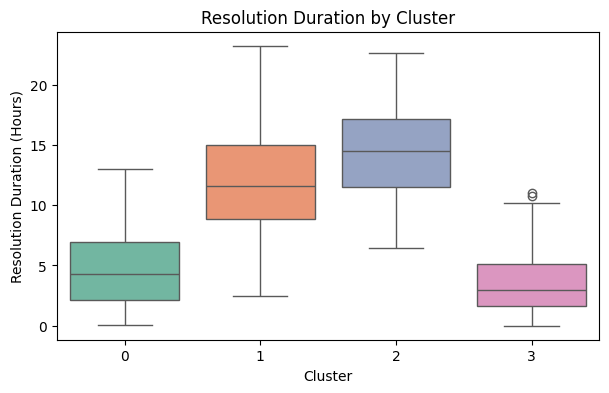

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x="Cluster",
    y="Resolution_Duration",
    palette="Set2"
)

plt.title("Resolution Duration by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Resolution Duration (Hours)")
plt.show()


Inference:

> Cluster 2 exhibits the highest median resolution duration, indicating tickets in this group take the longest time to resolve and may represent complex issues.

> Cluster 1 also shows relatively high and variable resolution times, suggesting moderate performance challenges.

> Clusters 0 and 3 have lower median resolution durations, indicating faster resolution and more efficient handling of tickets.

/tmp/ipython-input-1900448972.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


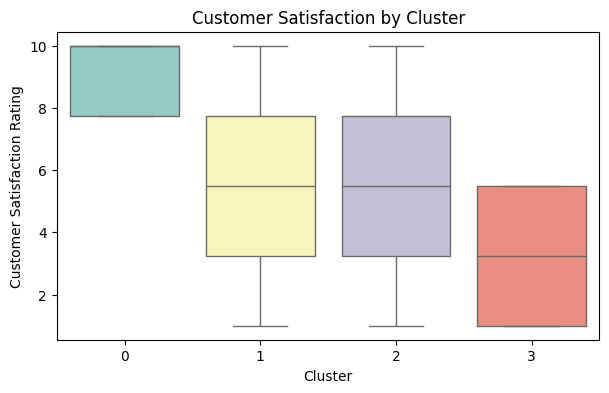

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x="Cluster",
    y="Customer Satisfaction Rating",
    palette="Set3"
)

plt.title("Customer Satisfaction by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Customer Satisfaction Rating")
plt.show()


SUMMARY:
> The analysis shows that a few ticket types, issue categories, and high-priority requests contribute most to the support workload. Cluster analysis further reveals that tickets with longer resolution durations are associated with lower customer satisfaction, indicating specific problem clusters that require focused process improvements.